In [1]:
from bioinfokit.analys import get_data
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, classification_report
from sklearn.svm import LinearSVC
import seaborn as sns

In [13]:
df= pd.read_csv("/Users/pai/Desktop/MDA/98-17(1).csv")
#df1=pd.read_csv("/Users/pai/Desktop/MDA/98-17(1).csv")

In [3]:
df.isna().sum()

Country                                                                                  0
Year                                                                                     0
Total population (1000 inhab)                                                            0
Population density (inhab/km2)                                                           0
GDP per capita (current US$/inhab)                                                       0
Long-term average annual precipitation in volume (10^9 m3/year)                          0
National Rainfall Index (NRI) (mm/yr)                                                    0
Total internal renewable water resources (IRWR) (10^9 m3/yr)                             0
Total internal renewable water resources per capita (m3/inhab/yr)                        0
Agricultural water withdrawal (10^9 m3/year)                                             0
Industrial water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year)    0

In [4]:
df.dtypes

Country                                                                                   object
Year                                                                                       int64
Total population (1000 inhab)                                                            float64
Population density (inhab/km2)                                                           float64
GDP per capita (current US$/inhab)                                                       float64
Long-term average annual precipitation in volume (10^9 m3/year)                          float64
National Rainfall Index (NRI) (mm/yr)                                                    float64
Total internal renewable water resources (IRWR) (10^9 m3/yr)                             float64
Total internal renewable water resources per capita (m3/inhab/yr)                        float64
Agricultural water withdrawal (10^9 m3/year)                                             float64
Industrial water withdrawal (k

In [9]:
df.dropna(axis=0,inplace=True)

In [11]:
df.reset_index(drop=True,inplace=True)

In [14]:
#df1=df.iloc[:,0:27]
#collist=df.columns
df=df.dropna(axis=0)
df.reset_index(drop=True,inplace=True)
#dfarray=pd.DataFrame(df.values)
#dfarray.columns = collist
df_efa=df.iloc[:,0:27]
df_efa2=df.iloc[:,0:27]
X = df_efa.iloc[:,2:27]

df_pca=df.iloc[:,0:27]
X2=df_pca.iloc[:,5:27]
y= df_pca.iloc[:,0]
y1 = df_pca.iloc[:,1]
Y = df_pca.iloc[:,[0,1]]


X.describe()

,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),National Rainfall Index (NRI) (mm/yr),Total internal renewable water resources (IRWR) (10^9 m3/yr),Total internal renewable water resources per capita (m3/inhab/yr),Agricultural water withdrawal (10^9 m3/year),Industrial water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year),Municipal water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year),...,SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),% of the cultivated area equipped for irrigation (%),Ratio between rainfed and irrigated yields (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
count,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.121291e+05,89.012157,10632.712279,1516.419086,1229.689404,637.570358,16464.958570,45.002144,13.440347,7.606129,...,24.874220,24.882098,0.551769,81.642513,70.265579,23.867636,1.805639,88.731788,82.281457,95.391391
std,2.915120e+05,88.069338,14558.593743,2946.768023,703.340501,1265.626550,33152.750317,121.072390,46.291918,16.730699,...,25.224942,45.428699,0.829257,221.094495,75.554853,25.893317,0.277521,13.334883,17.274823,5.636121
min,2.623780e+02,2.943688,219.963624,11.286000,207.100000,3.840000,271.737627,0.000400,0.011400,0.011400,...,0.318148,0.332478,0.019356,2.260524,1.728197,0.006733,1.289000,39.600000,25.500000,76.300000
25%,7.455337e+03,32.501017,1653.671921,86.037920,722.500000,23.500000,1646.960489,1.184000,0.135500,0.505900,...,4.139061,4.692675,0.119436,14.179242,22.066017,5.496912,1.603000,84.650000,73.700000,93.950000
50%,2.672037e+04,66.691821,4635.692195,381.900000,1112.000000,84.000000,3403.677490,5.101000,0.762492,1.063000,...,18.130315,12.333141,0.212079,30.288144,44.279650,15.768986,1.778000,94.100000,87.000000,97.700000
75%,5.402143e+04,103.799680,11637.343240,1014.558300,1813.000000,409.000000,19728.805425,26.764545,3.879500,4.001269,...,38.436782,20.708185,0.452262,66.333745,78.508973,35.072869,1.903000,98.150000,97.100000,99.350000
max,1.452625e+06,407.231917,70492.921730,14995.000000,3194.000000,5661.000000,205294.099300,688.000000,301.320000,79.400000,...,137.920360,349.767068,3.651947,2206.286394,374.909733,124.360786,2.612000,100.000000,100.000000,100.000000


In [15]:
#################
#####EFA#########
#################

####Normalization(x-μ)/std
X_norm = X.apply(lambda x:(x-x.mean())/x.std())
X_stand = StandardScaler().fit_transform(X)

In [16]:
####Bartletts test and KMO test
print('Bartletts test of sphericity tests')
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_stand)
print('chi-square',chi_square_value,'P-value', p_value)

#KMO>0.6
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_stand)
print('KMO Test',kmo_model)

Bartletts test of sphericity tests
chi-square 7140.825839795088 P-value 0.0
KMO Test 0.6035142728057387


/Users/pai/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


Eigenvalues of correlation matrix： [5.70976884e+00 4.52549733e+00 3.51059978e+00 2.63258766e+00
 1.92359619e+00 1.49120265e+00 1.13523436e+00 9.29616419e-01
 7.93937614e-01 6.36094068e-01 4.41006641e-01 3.74685424e-01
 2.40256408e-01 1.79560909e-01 1.53038264e-01 1.24777276e-01
 6.12723258e-02 4.66092288e-02 2.95959305e-02 2.60277310e-02
 1.71719281e-02 9.74609606e-03 6.99351821e-03 1.12275123e-03
 6.63941157e-07]


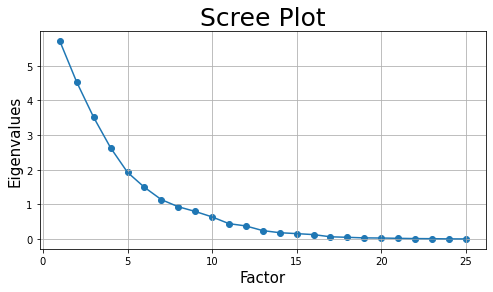

In [17]:
#Eigenvalues of correlation matrix 
fa = FactorAnalyzer(25, rotation='varimax',method='principal',impute='mean')
fa.fit(X_stand)
ev, v = fa.get_eigenvalues()
var = fa.get_factor_variance()
print('Eigenvalues of correlation matrix：',ev)
#Create scree plot using matplotlib
plt.figure(figsize=(8,4))
plt.scatter(range(1,X_stand.shape[1]+1),ev)
plt.plot(range(1,X_stand.shape[1]+1),ev)
plt.title('Scree Plot',fontdict={'weight':'normal','size': 25})
plt.xlabel('Factor',fontdict={'weight':'normal','size': 15})
plt.ylabel('Eigenvalues',fontdict={'weight':'normal','size': 15})
plt.grid()
# plt.savefig('E:/suishitu.jpg')
plt.show()

#Number of factors
n_factors = sum(ev>1)

In [18]:
#Result after rotating
fa2 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa2.fit(X_stand)
#Contribution rate
var = fa2.get_factor_variance()

#Factor scores
fa2_score = fa2.transform(X_stand)

column_list = ['fac'+str(i) for i in np.arange(n_factors)+1]
fa_score = pd.DataFrame(fa2_score,columns=column_list)
for col in fa_score.columns:
    df_efa[col] = fa_score[col]
print("\nFactor scores:\n",fa_score)    

#Contribution rate sheet
df_efa_fv = pd.DataFrame()
df_efa_fv['Factor'] = column_list
df_efa_fv['Variance contribute rates'] = var[1]
df_efa_fv['Cumulative contribution rate'] = var[2]
df_efa_fv['Propotion of cumulative contribution rate'] = var[1]/var[1].sum()
print("\nVariance contribute:\n",df_efa_fv)  


Factor scores:
          fac1      fac2      fac3      fac4      fac5      fac6      fac7
0   -0.485452 -0.137818 -0.000806  2.149121  0.185321 -0.630593 -0.605914
1   -0.605645  0.248052  0.182343 -0.162935 -0.691725  0.359668 -0.366009
2   -0.339481  0.422231 -0.414652  0.649232 -0.515365 -0.406998  0.135039
3   -0.289304  1.339201 -0.771830 -0.705486  0.596727  0.748675 -0.692827
4   -0.274628 -0.952409 -0.656306  0.888949 -0.605769  0.541694  1.099472
..        ...       ...       ...       ...       ...       ...       ...
146 -0.247894  0.411807 -0.196225 -0.510578 -0.579231 -0.572802 -0.931856
147 -0.085197 -2.882909 -0.020927  0.513370  1.289530 -0.362116  0.123292
148  0.888863  0.416701  1.247028  0.004532  0.460253  4.420119 -0.162449
149  0.552983  0.907019 -0.509622 -0.249331 -0.757075 -0.876767  0.177453
150 -0.486617 -0.506327 -0.304388  0.149055 -0.564164  0.221511 -0.833607

[151 rows x 7 columns]

Variance contribute:
   Factor  Variance contribute rates  Cumulative 

In [19]:
#Result after rotating
fa3 = FactorAnalyzer(4,rotation='varimax',method='principal')
fa3.fit(X_stand)
#Contribution rate
var = fa3.get_factor_variance()

#Factor scores
fa3_score = fa3.transform(X_stand)

column_list = ['fac'+str(i) for i in np.arange(4)+1]
fa_score = pd.DataFrame(fa3_score,columns=column_list)
for col in fa_score.columns:
    df_efa2[col] = fa_score[col]
print("\nFactor scores:\n",fa_score)    

#Contribution rate sheet
df_efa_fv = pd.DataFrame()
df_efa_fv['Factor'] = column_list
df_efa_fv['Variance contribute rates'] = var[1]
df_efa_fv['Cumulative contribution rate'] = var[2]
df_efa_fv['Propotion of cumulative contribution rate'] = var[1]/var[1].sum()
print("\nVariance contribute:\n",df_efa_fv)  


Factor scores:
          fac1      fac2      fac3      fac4
0   -0.396322 -0.657990  1.536461 -0.335984
1   -0.225854 -0.042928 -0.410450  0.372938
2   -0.559831  0.052520  0.549425  0.599207
3   -0.487253  1.555625 -0.115984 -0.690068
4   -0.545544 -0.604450  0.792578  1.090484
..        ...       ...       ...       ...
146 -0.351356 -0.176398 -0.321525 -0.092156
147 -0.250247 -2.105241  0.374296 -1.369673
148  2.385114  1.654109 -0.137615 -0.164580
149 -0.053491  0.399265  0.197603  0.785161
150 -0.434824 -0.750978  0.164503 -0.081233

[151 rows x 4 columns]

Variance contribute:
   Factor  Variance contribute rates  Cumulative contribution rate  \
0   fac1                   0.213329                      0.213329   
1   fac2                   0.177542                      0.390871   
2   fac3                   0.142895                      0.533766   
3   fac4                   0.121372                      0.655138   

   Propotion of cumulative contribution rate  
0              

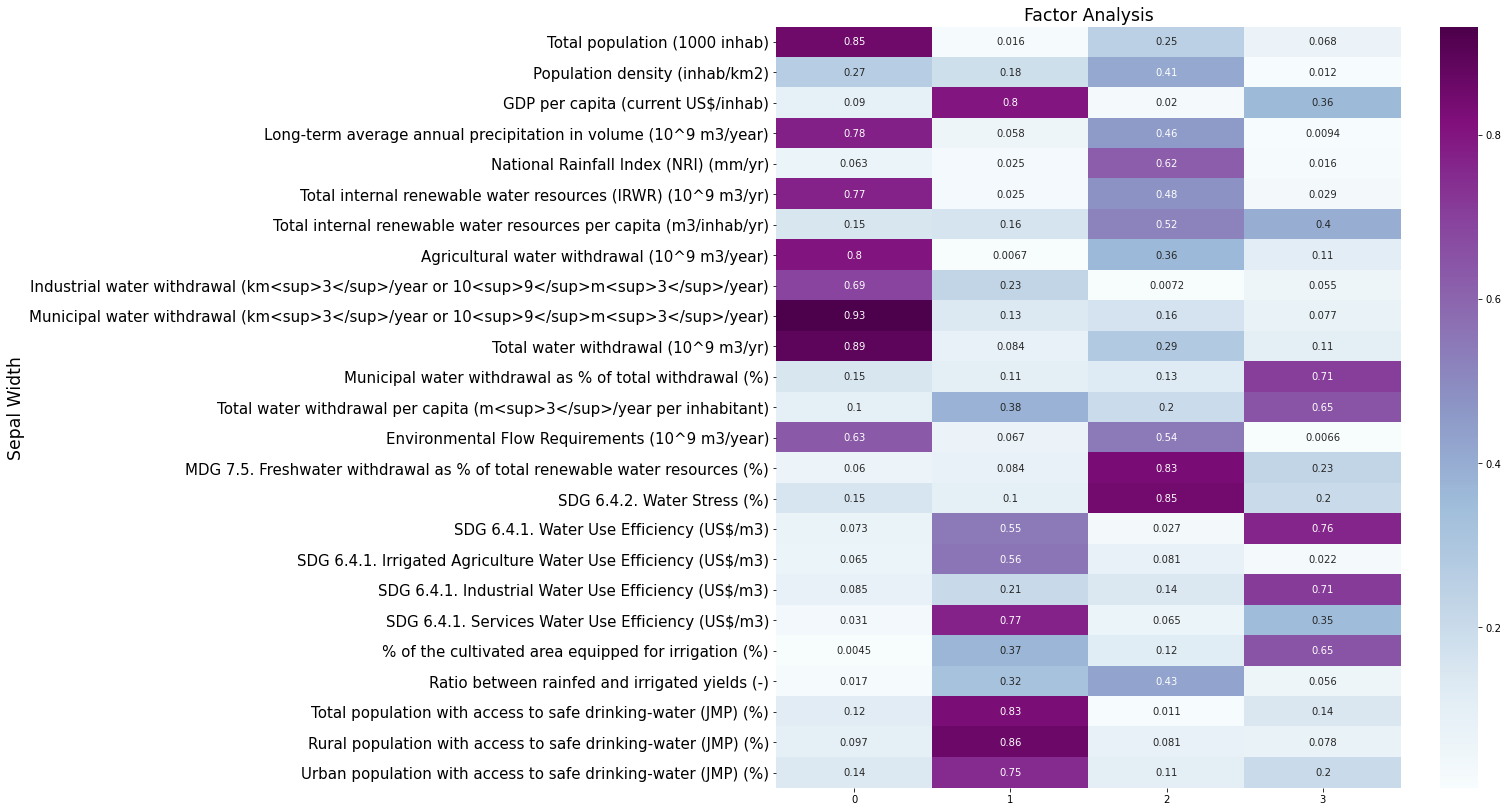

In [20]:
###### Factor1:Population
###### Factor2:Economy and technology
###### Factor3:Water source
###### Factor4:Urbanization
faloadings = pd.DataFrame(np.abs(fa3.loadings_), index=X.columns)
plt.figure(figsize = (14,14))
ax = sns.heatmap(faloadings, annot=True, cmap="BuPu")
# y-text label
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=500)

In [21]:
# Calculate the comprehensive score and ranking 
# (comprehensive score
#  = cumulative variance contribution proportion 1 * factor score 1
#  + cumulative variance contribution proportion 2 * factor score 2 + …)
df_efa2['factor_score'] = ((var[1]/var[1].sum())*fa3_score).sum(axis=1)
df_efa2 = df_efa2.sort_values(by='factor_score',ascending=False)

In [22]:
####sort all
df_efa2['sort_num']=df_efa2['factor_score'].rank(ascending=0,method='dense')

In [23]:
####sort by year
df_efa2['group_sort']=df_efa2['factor_score'].groupby(df_efa2['Year']).rank(ascending=0,method='dense')

In [24]:
for name1,group1 in df_efa2.iloc[:,[0,1,31,33]].groupby('Country'):
  print(name1)
  print(group1)

Algeria
     Country  Year  factor_score  group_sort
113  Algeria  2017      0.115569        15.0
75   Algeria  2012      0.020135        16.0
37   Algeria  2007     -0.010559        16.0
0    Algeria  2002     -0.034487        16.0
Argentina
       Country  Year  factor_score  group_sort
114  Argentina  2017      0.028260        18.0
76   Argentina  2012      0.012201        18.0
38   Argentina  2007     -0.045997        18.0
1    Argentina  2002     -0.105611        20.0
Armenia
     Country  Year  factor_score  group_sort
77   Armenia  2012      0.315675         7.0
39   Armenia  2007      0.286579         7.0
115  Armenia  2017      0.270619         9.0
2    Armenia  2002      0.062786        10.0
Austria
     Country  Year  factor_score  group_sort
40   Austria  2007      0.207960         9.0
116  Austria  2017      0.202965        12.0
78   Austria  2012      0.202030        12.0
3    Austria  2002      0.109770         9.0
Azerbaijan
        Country  Year  factor_score  group_so

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import math as m
from time import time
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
#################
#####PCA#########
#################

In [27]:
#Standarlization
X_stand = StandardScaler().fit_transform(X2)
print(X_stand)

[[-0.44414258 -1.40966985 -0.496519   ...  0.00513232  0.08238948
  -0.60372669]
 [ 0.04309879 -0.23921193 -0.27395154 ...  0.59953494  0.08238948
   0.49998142]
 [-0.51062585 -1.25189697 -0.4999976  ...  0.37381243  0.14046983
   0.58899014]
 ...
 [ 1.87757225 -0.41510159  1.72853965 ...  0.78763703  0.92455456
   0.71360235]
 [-0.31094689  1.08602317 -0.22050421 ...  0.66725169  0.84905011
   0.66019712]
 [-0.4289044  -0.72351475 -0.49571595 ... -0.89023364 -0.87012827
   0.2863605 ]]


In [28]:
#Reduction to 3 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_stand)
#Variance
var_ratio_pca = pca.explained_variance_ratio_
print(var_ratio_pca)
print(sum(var_ratio_pca))

[0.22534826 0.17856702 0.15183281]
0.5557480798304292


In [29]:
#####################
#####Cluster#########
#####################

In [30]:
##### 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import math as m
from time import time
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

0.016769886016845703


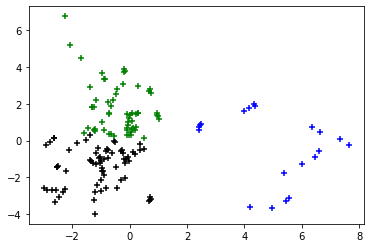

In [32]:
NOISE = 0
UNASSIGNED = -1
def load_data():
    data=(X2-X2.mean())/X2.std()
    pca = PCA(n_components=3) 
    XP = pca.fit_transform(data)
    return XP

def cal_dis(data, clu, k):

    dis = []
    for i in range(len(data)):
        dis.append([])
        for j in range(k):
            dis[i].append(m.sqrt((data[i, 0] - clu[j, 0])**2 + (data[i, 1]-clu[j, 1])**2))
    return np.asarray(dis)

def divide(data, dis):

    clusterRes = [0] * len(data)
    for i in range(len(data)):
        seq = np.argsort(dis[i])
        clusterRes[i] = seq[0]
    return np.asarray(clusterRes)

def center(data, clusterRes, k):

    clunew = []
    for i in range(k):
       
        idx = np.where(clusterRes == i)
        sum = data[idx].sum(axis=0)
        avg_sum = sum/len(data[idx])
        clunew.append(avg_sum)
    clunew = np.asarray(clunew)
    return clunew[:, 0: 2]

def classfy(data, clu, k):
    
    clulist = cal_dis(data, clu, k)
    clusterRes = divide(data, clulist)
    clunew = center(data, clusterRes, k)
    err = clunew - clu
    return err, clunew, k, clusterRes

def plotRes(data, clusterRes, clusterNum):
   
    nPoints = len(data)
    scatterColors = ['black', 'blue', 'green', 'yellow', 'red', 'purple']
    for i in range(clusterNum):
        color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='+')
    plt.show()


if __name__ == '__main__':
    t1=time() 
    k =3                              
    data = load_data()
    clu = random.sample(data[:, 0:2].tolist(), k)  
    clu = np.asarray(clu)
    err, clunew,  k, clusterRes = classfy(data, clu, k)
    while np.any(abs(err) > 0):
        err, clunew,  k, clusterRes = classfy(data, clunew, k)
    clulist = cal_dis(data, clunew, k)
    clusterResult = divide(data, clulist)
    print(time()-t1)       
    plotRes(data, clusterResult, k)


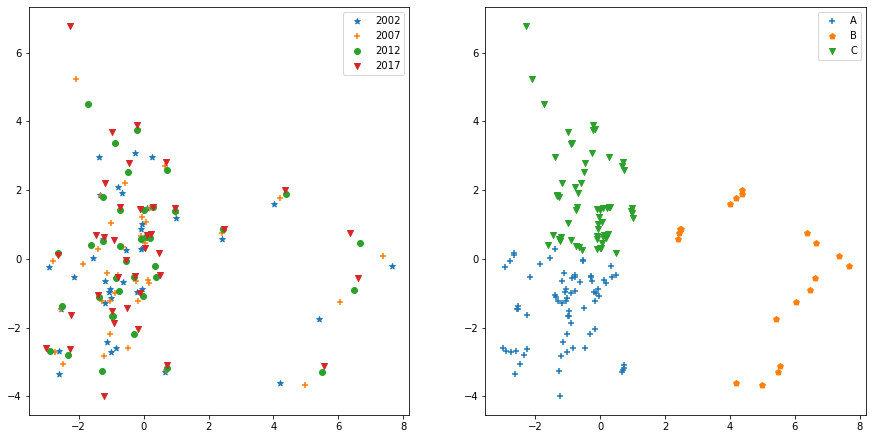

In [33]:
fig3=plt.figure(figsize=(15,7.5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0][y1==2002],X_pca[:,1][y1==2002],marker='*',label='2002')
plt.scatter(X_pca[:,0][y1==2007],X_pca[:,1][y1==2007],marker='+',label='2007')
plt.scatter(X_pca[:,0][y1==2012],X_pca[:,1][y1==2012],marker='o',label='2012')
plt.scatter(X_pca[:,0][y1==2017],X_pca[:,1][y1==2017],marker='v',label='2017')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0][clusterResult==0],X_pca[:,1][clusterResult==0],marker='+',label='A')
plt.scatter(X_pca[:,0][clusterResult==1],X_pca[:,1][clusterResult==1],marker='p',label='B')
plt.scatter(X_pca[:,0][clusterResult==2],X_pca[:,1][clusterResult==2],marker='v',label='C')
plt.legend()


In [34]:
#######定义3D图
def componential_plot_static_3d(reduced_data, labels, pc, variable):
    """draw a static componential plot in 3d for three principle components
    
    :param reduced_data: data processed by PCA
    :param labels: labels of original dataset 
    :param pc: all the principle components
    :param variable: the name of the variables of the data set
    """
    
    fig = plt.figure(1, figsize=(14, 12))
    ax = plt.axes(projection='3d')
    
    legend = []  # 
    classes = np.unique(labels)  # label type
    n = pc.shape[1]
    colors = ['g', 'r', 'y','b']
    markers = ['o', '^', 'x','s']
    
    x = reduced_data[:, 0]  # variable contributions for PC1
    y = reduced_data[:, 1]  # variable contributions for PC2 
    z = reduced_data[:, 2]  # variable contributions for PC3
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    scalez = 1.0/(z.max() - z.min())
    
    # Draw a data point projection plot that is projected to 
    # a three-dimensional space using normal PCA
    for i, label in enumerate(classes):
        ax.scatter3D(x[labels==label] * scalex,
                     y[labels==label] * scaley,
                     z[labels==label] * scalez,
                     linewidth=0.01) 
        # hyperparameter in plt.scatter(): c=colors[i], marker=markers[i]
        legend.append("Label: {}".format(label))
    
    ax.legend(legend)
    
    # the initial angle to draw the 3d plot
    azim = -60  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)  # set the angles
    
    # plot arrows as the variable contribution,
    # each variable has a score for PC1, for PC2 and for PC3 respectively
    for i in range(n):
        ax.quiver(0, 0, 0, pc[0, i], pc[1, i], pc[2, i], color='k', alpha=0.7,
                  linewidth=1, arrow_length_ratio=0.05)
        #ax.text(pc[0, i]*1.1, pc[1, i]*1.1, pc[2, i]*1.1,variable[i],
                #ha='center', va='center', color='k', fontsize=12)
        
    ax.set_xlabel("$PC1$")
    ax.set_ylabel("$PC2$")
    ax.set_zlabel("$PC3$")
    plt.title("Componential Plot in 3 Dimension")
    plt.grid()
    #save_fig("Componential_Plot_in_3_Dimension")

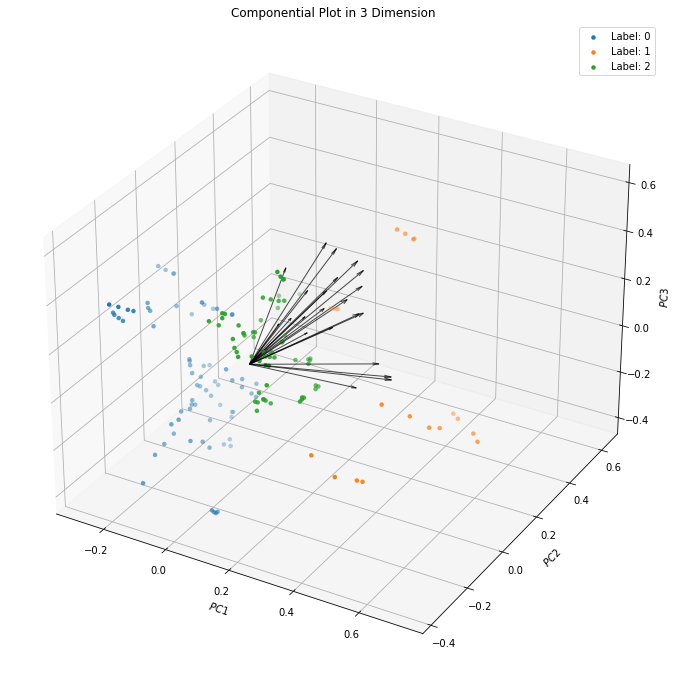

In [35]:
arrayYear=Y.values[:,1]
arrayCountry=Y.values[:,0]
pc=abs( pca.components_ )
variables=X2.columns
componential_plot_static_3d(X_pca,clusterResult,pc,variables)

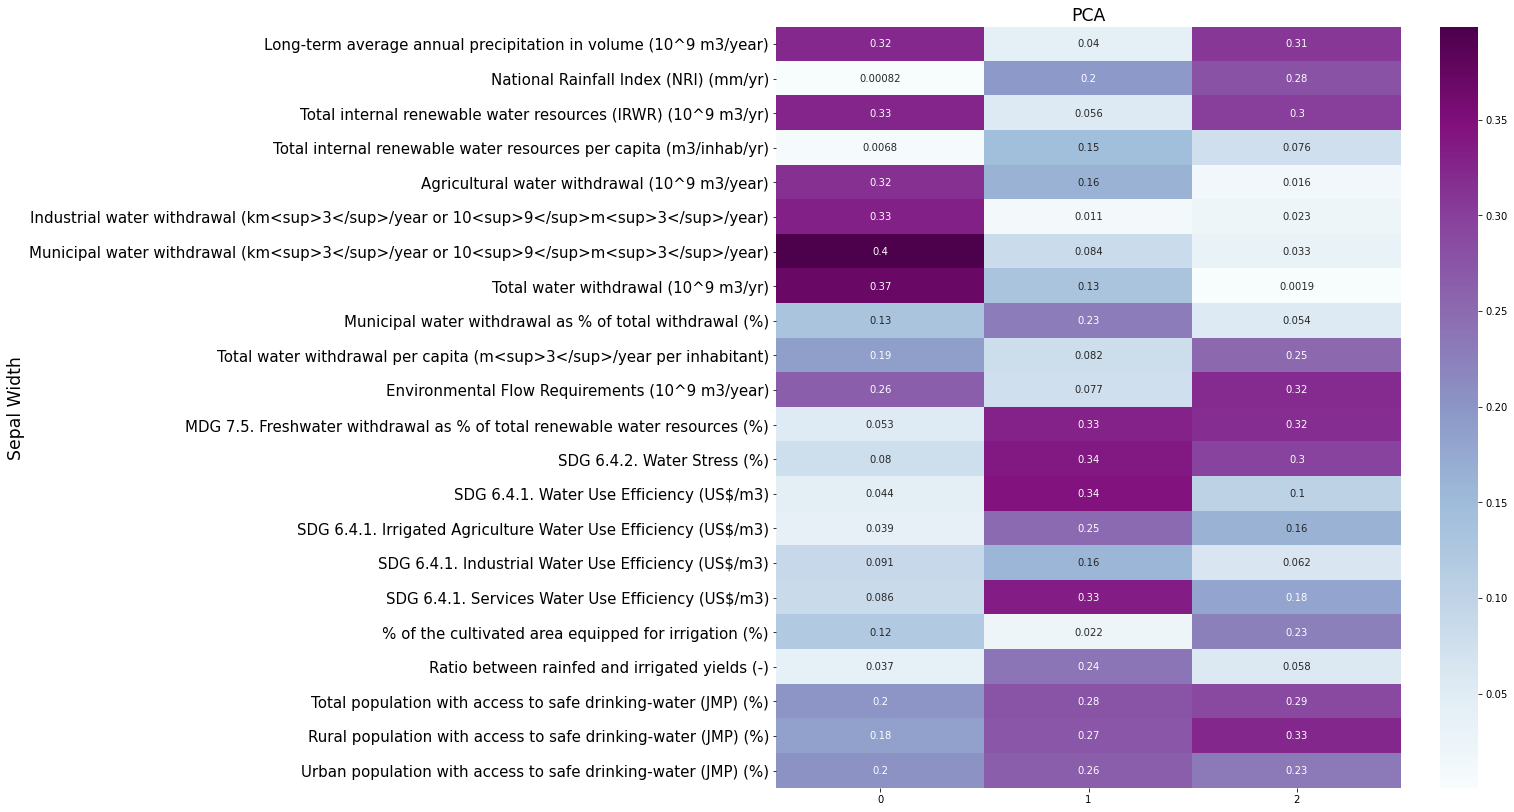

In [36]:
pcaloadings=pd.DataFrame(abs( pca.components_ ))
pcaloadings.columns=X2.columns
pcaloadings=pcaloadings.T

plt.figure(figsize = (14,14))
ax = sns.heatmap(pcaloadings, annot=True, cmap="BuPu")
# y-text
ax.yaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('PCA.png', dpi=500)

In [37]:
pca_result=pd.DataFrame(X_pca)
CR=pd.DataFrame(clusterResult)
CR.columns=['Cluster']
pca_result.columns=['Water_Withdraw','Water_eff','Water_Sourse'] 
result=CR.join(pca_result)
array = Y.values
Y=pd.DataFrame(array)
Y.columns=['Country','Year']
final=Y.join(result)
Performance=pd.merge(final,df_pca,how="right")
Performance

,Country,Year,Cluster,Water_Withdraw,Water_eff,Water_Sourse,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),...,SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),% of the cultivated area equipped for irrigation (%),Ratio between rainfed and irrigated yields (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
0,Algeria,2002,0,-1.141284,-2.415546,-1.647939,31855.109,13.374721,1775.875268,211.97486,...,85.037372,15.008760,0.343842,103.287177,20.403191,7.623864,2.207369,88.8,83.7,92.0
1,Argentina,2002,2,-0.089147,0.279733,0.112311,37681.749,13.552636,2918.591423,1643.00000,...,8.794229,9.249703,0.109619,22.932637,39.086531,7.408568,1.690000,96.7,83.7,98.2
2,Armenia,2002,0,-0.625464,-0.661076,-1.394416,3033.978,102.016745,835.283238,16.71388,...,34.940488,2.209566,0.469899,17.448563,3.788347,55.702648,1.778000,93.7,84.7,98.7
3,Austria,2002,2,-0.255646,3.079024,-1.665812,8134.412,96.976776,26232.686230,93.10680,...,9.883946,78.500721,2.138762,27.501602,312.934543,6.318223,1.778000,100.0,100.0,100.0
4,Azerbaijan,2002,0,-0.848730,-2.591063,-0.910166,8277.061,95.578072,753.417207,38.71020,...,44.491058,1.291719,0.244383,2.260524,6.039129,69.115936,1.778000,75.8,61.5,89.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ukraine,2017,2,-0.901614,0.555175,0.357929,44487.709,73.710064,2536.925650,341.00575,...,11.188132,7.749511,0.059290,5.384618,21.564308,7.737088,1.778000,96.2,97.8,95.5
147,United Republic of Tanzania,2017,0,-2.997599,-2.585198,2.416359,54660.339,57.701192,954.877401,1014.55830,...,12.963241,6.915170,0.183339,533.921214,41.083469,2.322684,2.612000,55.6,45.5,77.2
148,United States of America,2017,1,6.367942,0.741297,-0.159038,325084.756,33.059444,60159.823420,7030.83810,...,28.161984,42.378501,0.203423,15.115225,267.560173,16.647054,1.579000,99.2,98.2,99.4
149,Viet Nam,2017,2,0.482764,0.161597,-0.736193,94600.648,285.604106,2342.244006,603.16983,...,18.130315,2.349448,0.373668,20.351487,83.840791,39.777735,2.031000,97.6,96.9,99.1


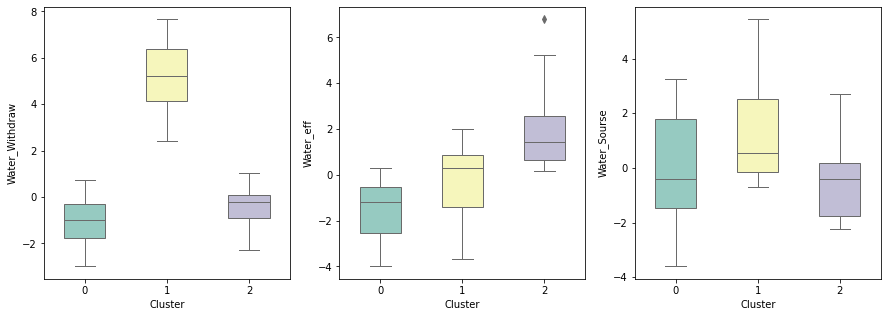

In [38]:
plt.figure(figsize=(15, 5))
#1
plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster", y='Water_Withdraw', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster", y='Water_eff', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster", y='Water_Sourse', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

In [79]:
##############################################################
######Cluster Result##########################################
##############################################################
### Withdraw   Efficiency   Source                          ##
# O:  low         low        low  ---------> A              ##
# 1:  high       medium      high ---------> B              ##
# 2:  low         high       low  ---------> C              ##
##############################################################
##############################################################


In [39]:
#  Check each year cluster in countries
for name2002,group2002 in Performance[Performance['Year'] == 2002].iloc[:,[0,2]].groupby('Cluster'):
  print(name2002)
  print(group2002)
for name2007,group2007 in Performance[Performance['Year'] == 2007].iloc[:,[0,2]].groupby('Cluster'):
  print(name2007)
  print(group2007)
for name2012,group2012 in Performance[Performance['Year'] == 2012].iloc[:,[0,2]].groupby('Cluster'):
  print(name2012)
  print(group2012)
for name2017,group2017 in Performance[Performance['Year'] == 2017].iloc[:,[0,2]].groupby('Cluster'):
  print(name2017)
  print(group2017)

0
                        Country  Cluster
0                       Algeria        0
2                       Armenia        0
4                    Azerbaijan        0
7      Central African Republic        0
10                         Cuba        0
11           Dominican Republic        0
12                        Ghana        0
15   Iran (Islamic Republic of)        0
18                        Kenya        0
19                   Madagascar        0
21                       Mexico        0
22                      Morocco        0
23                      Myanmar        0
25                    Nicaragua        0
29                 South Africa        0
33  United Republic of Tanzania        0
35                     Viet Nam        0
36                     Zimbabwe        0
1
                     Country  Cluster
6                     Brazil        1
8                      China        1
14                     India        1
27        Russian Federation        1
34  United States of Americ

In [40]:
##  Check each country cluster in each years
#  Ghana：12,50,88,126[0,0,2,2]
#  Nicaragua 25,61,101,139[0,0,2,2]
# Viet Nam 35,73,111,149[0,0,0,2]
for name,group in Performance.iloc[:,0:3].groupby('Country'):
  print(name)
  print(group)

Algeria
     Country  Year  Cluster
0    Algeria  2002        0
37   Algeria  2007        0
75   Algeria  2012        0
113  Algeria  2017        0
Argentina
       Country  Year  Cluster
1    Argentina  2002        2
38   Argentina  2007        2
76   Argentina  2012        2
114  Argentina  2017        2
Armenia
     Country  Year  Cluster
2    Armenia  2002        0
39   Armenia  2007        0
77   Armenia  2012        0
115  Armenia  2017        0
Austria
     Country  Year  Cluster
3    Austria  2002        2
40   Austria  2007        2
78   Austria  2012        2
116  Austria  2017        2
Azerbaijan
        Country  Year  Cluster
4    Azerbaijan  2002        0
41   Azerbaijan  2007        0
79   Azerbaijan  2012        0
117  Azerbaijan  2017        0
Belize
    Country  Year  Cluster
5    Belize  2002        2
42   Belize  2007        2
80   Belize  2012        2
118  Belize  2017        2
Brazil
    Country  Year  Cluster
6    Brazil  2002        1
43   Brazil  2007        1


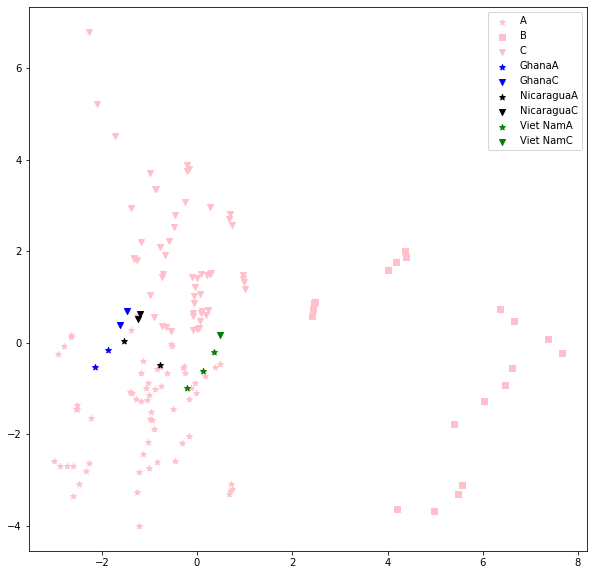

In [41]:
####
fig5=plt.figure(figsize=(10,10))
arrayCountry = y.values
arrayYear = y1.values
plt.scatter(X_pca[:,0][clusterResult==0],X_pca[:,1][clusterResult==0],marker='*',label='A',c='pink')
plt.scatter(X_pca[:,0][clusterResult==1],X_pca[:,1][clusterResult==1],marker='s',label='B',c='pink')
plt.scatter(X_pca[:,0][clusterResult==2],X_pca[:,1][clusterResult==2],marker='v',label='C',c='pink')
#Ghana
plt.scatter(X_pca[:,0][[12,50]],X_pca[:,1][[12,50]],marker='*',label='GhanaA',c='blue')
plt.scatter(X_pca[:,0][[88,126]],X_pca[:,1][[88,126]],marker='v',label='GhanaC',c='blue')
#Nicaragua
plt.scatter(X_pca[:,0][[25,61]],X_pca[:,1][[25,61]],marker='*',label='NicaraguaA',c='black')
plt.scatter(X_pca[:,0][[101,139]],X_pca[:,1][[101,139]],marker='v',label='NicaraguaC',c='black')
#Viet Nam
plt.scatter(X_pca[:,0][[35,73,111]],X_pca[:,1][[35,73,111]],marker='*',label='Viet NamA',c='green')
plt.scatter(X_pca[:,0][[149]],X_pca[:,1][[149]],marker='v',label='Viet NamC',c='green')
plt.legend()
plt.show()

In [83]:
######These three contries are clusterd in different group because of closing to boundary

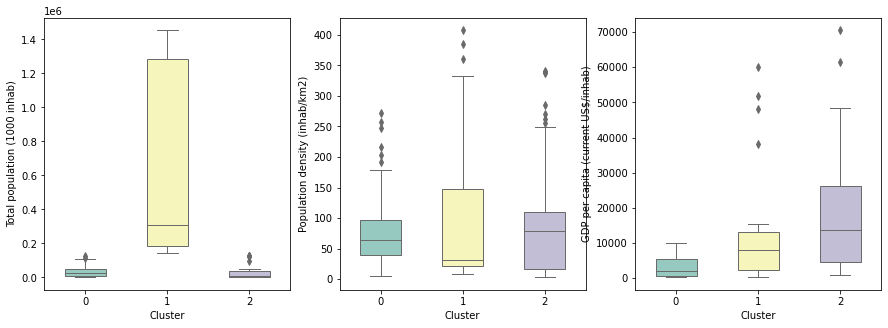

In [42]:
plt.figure(figsize=(15,5))
#1
plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster", y='Total population (1000 inhab)', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster", y='Population density (inhab/km2)', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster", y='GDP per capita (current US$/inhab)',data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

In [43]:
dfmixed=Performance.join(df_efa2.iloc[:,-7:])
dfmixed

,Country,Year,Cluster,Water_Withdraw,Water_eff,Water_Sourse,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),...,Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%),fac1,fac2,fac3,fac4,factor_score,sort_num,group_sort
0,Algeria,2002,0,-1.141284,-2.415546,-1.647939,31855.109,13.374721,1775.875268,211.97486,...,88.8,83.7,92.0,-0.396322,-0.657990,1.536461,-0.335984,-0.034487,72.0,16.0
1,Argentina,2002,2,-0.089147,0.279733,0.112311,37681.749,13.552636,2918.591423,1643.00000,...,96.7,83.7,98.2,-0.225854,-0.042928,-0.410450,0.372938,-0.105611,90.0,20.0
2,Armenia,2002,0,-0.625464,-0.661076,-1.394416,3033.978,102.016745,835.283238,16.71388,...,93.7,84.7,98.7,-0.559831,0.052520,0.549425,0.599207,0.062786,55.0,10.0
3,Austria,2002,2,-0.255646,3.079024,-1.665812,8134.412,96.976776,26232.686230,93.10680,...,100.0,100.0,100.0,-0.487253,1.555625,-0.115984,-0.690068,0.109770,51.0,9.0
4,Azerbaijan,2002,0,-0.848730,-2.591063,-0.910166,8277.061,95.578072,753.417207,38.71020,...,75.8,61.5,89.2,-0.545544,-0.604450,0.792578,1.090484,0.033451,59.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ukraine,2017,2,-0.901614,0.555175,0.357929,44487.709,73.710064,2536.925650,341.00575,...,96.2,97.8,95.5,-0.351356,-0.176398,-0.321525,-0.092156,-0.249416,107.0,28.0
147,United Republic of Tanzania,2017,0,-2.997599,-2.585198,2.416359,54660.339,57.701192,954.877401,1014.55830,...,55.6,45.5,77.2,-0.250247,-2.105241,0.374296,-1.369673,-0.824114,147.0,37.0
148,United States of America,2017,1,6.367942,0.741297,-0.159038,325084.756,33.059444,60159.823420,7030.83810,...,99.2,98.2,99.4,2.385114,1.654109,-0.137615,-0.164580,1.164406,10.0,3.0
149,Viet Nam,2017,2,0.482764,0.161597,-0.736193,94600.648,285.604106,2342.244006,603.16983,...,97.6,96.9,99.1,-0.053491,0.399265,0.197603,0.785161,0.279343,28.0,8.0


<AxesSubplot:xlabel='Cluster', ylabel='group_sort'>

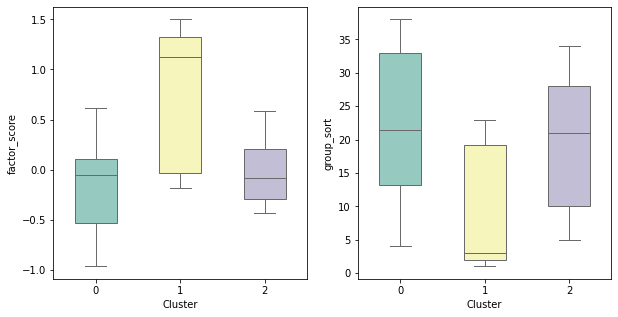

In [44]:
plt.figure(figsize=(10,5))
#1
plt.subplot(1, 2, 1)
sns.boxplot(x="Cluster", y='factor_score', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 2, 2)
sns.boxplot(x="Cluster", y='group_sort', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 

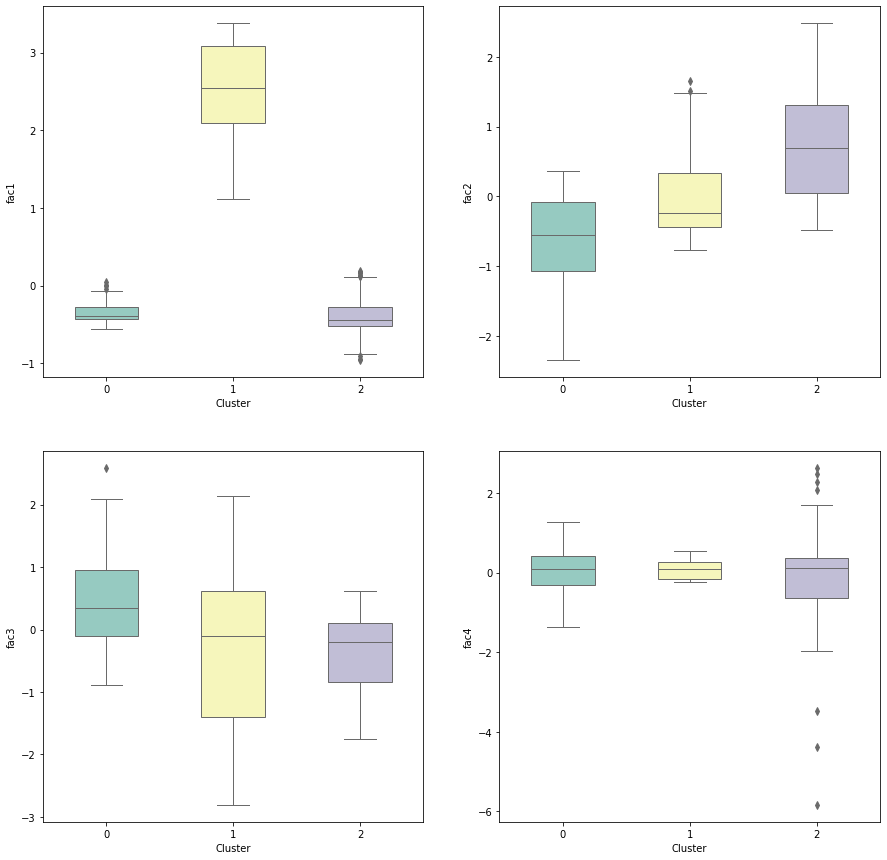

In [45]:
plt.figure(figsize=(15, 15))
#1
plt.subplot(2, 2, 1)
sns.boxplot(x="Cluster", y='fac1', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(2, 2, 2)
sns.boxplot(x="Cluster", y='fac2', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(2, 2, 3)
sns.boxplot(x="Cluster", y='fac3', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 

plt.subplot(2, 2, 4)
sns.boxplot(x="Cluster", y='fac4', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

In [42]:
!pip3 install pyecharts==0.5.10
!pip3 install echarts-countries-pypkg

In [46]:
from pyecharts import Map
Performance[Performance['Year'] == 2007]['Cluster'].values*50
Performance['Country']=Performance['Country'].str.replace('Central African Republic','Central African Rep').str.replace('Dominican Republic','Dominican Rep').str.replace('Iran (Islamic Republic of)','Iran').str.replace('Russian Federation','Russia').str.replace('United Republic of Tanzania','Tanzania').str.replace('United States of America','United States').str.replace('Viet Nam','Vietnam')
value =Performance[Performance['Year'] == 2007]['Cluster'].values*50
attr = Performance[Performance['Year'] == 2007]['Country'].values
map0 = Map("Nation", width=1200, height=600)
map0.add("Nation", attr, value, maptype="world",  is_visualmap=True, visual_text_color='#000')